# Matrix Decomposition

Matrix decomposition, also known as matrix factorization, is incredibly important in data science and the handling of big data. It involves breaking down a complex matrix into simpler, more interpretable components, which facilitates analysis, computation, and the extraction of meaningful insights. In the context of big data, matrix decomposition becomes even more crucial due to the volume, complexity, and challenges posed by massive datasets. Below are some real world applications where Matrix Decomposition is used:
1. **Dimensionality Reduction:** Matrix decomposition can transform high-dimensional data into a lower-dimensional representation while preserving relevant information. This is vital for efficient storage, visualization, and analysis.
2. **Noise Reduction:** Decomposing a matrix can help separate the signal from the noise, enhancing the quality of the data and leading to more accurate analyses.
3. **Feature Extraction:** Matrix decomposition can reveal hidden patterns or features in data, making it easier to extract relevant information for modeling and analysis.
4. **Data Compression:** In big data scenarios, matrix decomposition can compress the data, allowing for faster data transfer, storage, and processing.
5. **Efficient Computation:** Decomposed matrices often have useful properties that enable more efficient mathematical operations, such as solving systems of equations or performing matrix multiplications faster.
6. **Interpretability:** Decomposed components might have clear physical or conceptual interpretations, aiding in understanding complex relationships in the data.
7. **Improved Predictive Models:** Matrix decomposition techniques can enhance the performance of machine learning models by providing meaningful features or reducing noise.

*Below I'll discuss some popular matrix decomposition techniques:*

## 0. Eigendecomposition


## 1. Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful matrix decomposition method that expresses a given matrix as a product of three matrices. It has significant applications in data analysis, dimensionality reduction, and solving linear equations.

#### Step-by-Step Breakdown:

1. **Given Matrix $ A $**: Let's consider a real or complex matrix $ A $ of size $ m \times n $.

2. **Decompose into Three Matrices**: SVD decomposes $ A $ into three matrices $ U $, $ \Sigma $, and $ V^T $ such that:
<h4><center>$
   A = U \Sigma V^T
$</center></h4>
   
where:
- $ U $ is an $ m \times m $ orthogonal matrix (i.e., $ U^T U = I $).
- $ \Sigma $ is an $ m \times n $ diagonal matrix containing singular values.
- $ V^T $ is an $ n \times n $ orthogonal matrix (i.e., $ V^T V = I $).

3. **Compute Eigenvectors and Eigenvalues**: The columns of $ U $ and $ V $ are the eigenvectors of $ AA^T $ and $ A^T A $, respectively. The singular values in $ \Sigma $ are the square roots of the eigenvalues of $ AA^T $.

#### Mathematical Components:
SVD utilize fundamental techniques in linear algebra that work due to specific mathematical properties and principles (*Outlined in the previous notebook*). Now, I will explain why these properties are so significant in the context of SVD:
- ***Existence:*** Every matrix $A$ (including non-square matrices) has an SVD. This universality is what makes SVD so powerful.
- ***Orthogonality:*** The columns of $U$ and $V$ are orthonormal eigenvectors of $AA^T$ and $A^T A$ respectively. Orthonormal vectors have well-defined geometric properties, such as preserving distances and angles.
- ***Diagonalization:*** The matrix $\Sigma$ contains the singular values (square roots of eigenvalues of $AA^T$) on its diagonal. Diagonal matrices are computationally efficient to work with and reveal the "strength" or "importance" of each component.
- ***Robustness:*** SVD is numerically stable, meaning it provides reliable results even in the presence of numerical errors or ill-conditioned matrices.

#### Importance in Machine Learning / Data Science:
- ***Dimensionality Reduction*** By keeping only the largest singular values, you can reduce the dimension of data without losing significant information.
- ***Data Compression*** SVD allows for data compression by approximating the original matrix with fewer singular values.
- ***Principal Component Analysis (PCA*** SVD is used in PCA to find the directions of maximum variance in data.
- ***Recommendation Systems*** SVD is employed in collaborative filtering to provide personalized recommendations.

***Application:*** SVD can be applied to image compression by reducing the dimensions of the image while retaining most of its information. 

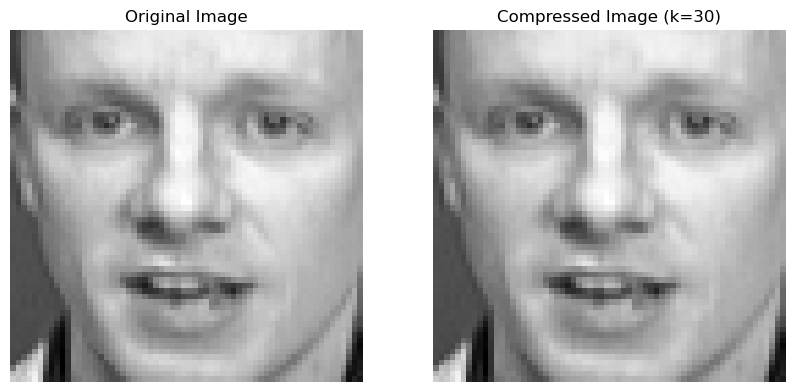

In [1]:
from scipy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np

# Load a sample image from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
image = faces.images[0]

# Perform SVD
U, s, Vt = svd(image)

# Keep only the top 30 singular values
k = 30
U_k = U[:, :k]
s_k = np.diag(s[:k])
Vt_k = Vt[:k, :]

# Reconstruct the compressed image
compressed_image = U_k @ s_k @ Vt_k

# Plot original and compressed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(compressed_image, cmap='gray')
ax2.set_title(f'Compressed Image (k={k})')
ax2.axis('off')
plt.show()

**Significance:** The original image is decomposed into $U \Sigma V^T$ using SVD. By keeping only the top $k$ singular values, we create a compressed representation of the image. This is useful for storing and transmitting images efficiently.

## 2. QR Decomposition

QR Decomposition is another vital method that decomposes a given matrix into a product of an orthogonal matrix and an upper triangular matrix.

#### Step-by-Step Breakdown:

1. **Given Matrix $ A $**: Let's consider a real or complex matrix $ A $ of size $ m \times n $.

2. **Decompose into Two Matrices**: QR decomposition decomposes $ A $ into two matrices $ Q $ and $ R $ such that:
<h4><center>$   A = QR
$</center></h4>

where:
- $ Q $ is an $ m \times m $ orthogonal matrix (i.e., $ Q^T Q = I $).
- $ R $ is an $ m \times n $ upper triangular matrix.

3. **Use Gram-Schmidt Process**: The Gram-Schmidt process or other similar algorithms can be used to obtain $ Q $ and $ R $.

#### Linear Algebra Theory
- ***Existence:*** Similar to SVD, every matrix $A$ has a QR Decomposition.
- ***Orthogonality:*** The matrix $Q$ is orthogonal, meaning $Q^T Q = I$. Orthogonal matrices preserve geometric properties and are computationally efficient to work with.
- ***Triangular Structure:*** The matrix $R$ is upper triangular, meaning all entries below its main diagonal are zero. Triangular matrices simplify many mathematical operations, such as solving linear equations.
- ***Uniqueness:*** Under certain conditions (e.g., all diagonal entries of $R$ are positive), the QR Decomposition is unique.
- ***Algorithms:*** Several algorithms can compute QR Decomposition, leveraging the properties of orthogonal and triangular matrices.

#### Importance in Machine Learning / Data Science:
- ***Solving Linear Equations:*** QR Decomposition provides a stable and efficient way to solve linear systems.
- ***Least Squares:*** QR Decomposition is used to solve least squares problems, a fundamental task in regression analysis.
- ***Numerical Analysis:*** It's a building block for various numerical methods used in simulations, optimizations, and solving differential equations.

***Application:*** QR Decomposition can be used to solve linear regression problems efficiently. 

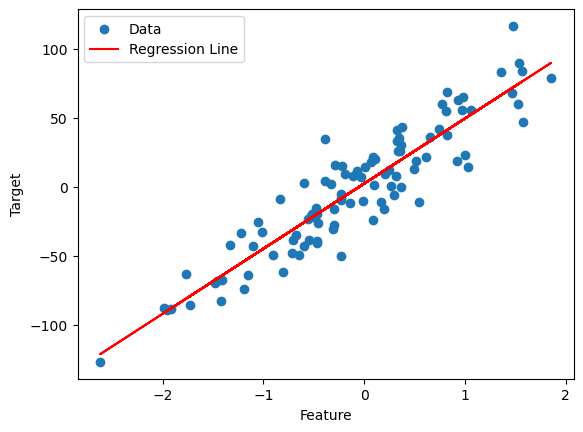

array([ 2.33023064, 47.13323967])

In [2]:
from scipy.linalg import qr
from sklearn.datasets import make_regression

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = np.hstack([np.ones_like(X), X])  # Add a bias term

# Perform QR Decomposition
Q, R = qr(X)

# Transform the problem into a simpler form
y_transformed = Q.T @ y

# Solve the transformed problem for coefficients
coefficients = np.linalg.solve(R[:X.shape[1],:], y_transformed[:X.shape[1]])

# Predict using the coefficients
predictions = X @ coefficients

# Plot the original data and regression line
plt.scatter(X[:, 1], y, label='Data')
plt.plot(X[:, 1], predictions, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

coefficients

**Significance:** Here QR Decomposition is applied to solve for the coefficients of the linear model. This approach is also used in statistical modeling to find the best linear relationship between features and targets.